# data exploration

## Goals
- examine the distribution of each of the variables of interest in the data
- determine if there are any potentially useful features that are correlated with our outcome variables
- engineer relevant features based on exploration of data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import matplotlib.image as mpimg
import calendar
import geopandas as gpd
import contextily as ctx

In [2]:
sns.set_style("white")

In [3]:
data = pd.read_parquet('../data/processed_data.parquet')

In [4]:
data['available_prop'] = (data['arrivals'] - data['departures']) / data['capacity']

In [5]:
data[['available_prop', 'departures', 'arrivals', "tavg", "tmax", "tmin", "prcp", "snow"]].describe().round(3)

,available_prop,departures,arrivals,tavg,tmax,tmin,prcp,snow
count,3211613.000,3211613.000,3211613.000,3211613.000,3211613.000,3211613.000,3211613.000,3211613.000
mean,-0.000,2.057,2.057,16.751,21.712,12.441,3.232,0.036
std,0.130,2.961,2.940,9.301,9.790,9.258,9.324,0.542
min,-2.696,0.000,0.000,-9.300,-6.000,-13.200,0.000,0.000
25%,-0.067,0.000,0.000,8.400,13.300,3.900,0.000,0.000
50%,0.000,1.000,1.000,18.900,24.400,13.900,0.000,0.000
75%,0.067,3.000,3.000,25.100,30.000,21.100,0.800,0.000
max,2.889,97.000,127.000,32.700,37.200,27.200,101.600,21.100


In [6]:
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['dow'] = data['date'].dt.day_of_week
data['doy'] = data['date'].dt.day_of_year
data['weekday'] = data['date'].dt.weekday

In [7]:
data

,station,date,hour,arrivals,departures,start_ind,name,capacity,latitude,longitude,...,tmax,tmin,holiday,available_prop,year,month,day,dow,doy,weekday
0,0,2019-11-30,8,1.0,0.0,False,22nd & H St NW,17,38.898925,-77.048852,...,7.8,5.0,0,0.058824,2019,11,30,5,334,5
1,0,2019-11-30,16,1.0,0.0,False,22nd & H St NW,17,38.898925,-77.048852,...,7.8,5.0,0,0.058824,2019,11,30,5,334,5
2,0,2019-11-30,19,1.0,0.0,False,22nd & H St NW,17,38.898925,-77.048852,...,7.8,5.0,0,0.058824,2019,11,30,5,334,5
3,0,2019-12-01,8,1.0,0.0,False,22nd & H St NW,17,38.898925,-77.048852,...,7.8,4.4,0,0.058824,2019,12,1,6,335,6
4,0,2019-12-01,13,1.0,0.0,False,22nd & H St NW,17,38.898925,-77.048852,...,7.8,4.4,0,0.058824,2019,12,1,6,335,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211608,32609,2019-12-24,7,0.0,1.0,False,W Columbia St & N Washington St,12,38.885621,-77.166917,...,12.2,0.6,0,-0.083333,2019,12,24,1,358,1
3211609,32609,2019-12-26,13,1.0,0.0,False,W Columbia St & N Washington St,12,38.885621,-77.166917,...,12.8,-0.5,0,0.083333,2019,12,26,3,360,3
3211610,32609,2019-12-28,11,1.0,1.0,False,W Columbia St & N Washington St,12,38.885621,-77.166917,...,19.4,3.3,0,0.000000,2019,12,28,5,362,5
3211611,32609,2019-12-28,14,2.0,2.0,False,W Columbia St & N Washington St,12,38.885621,-77.166917,...,19.4,3.3,0,0.000000,2019,12,28,5,362,5


## outcome variables: arrivals and departures
- examining arrivals and departures over different time and space dimensions

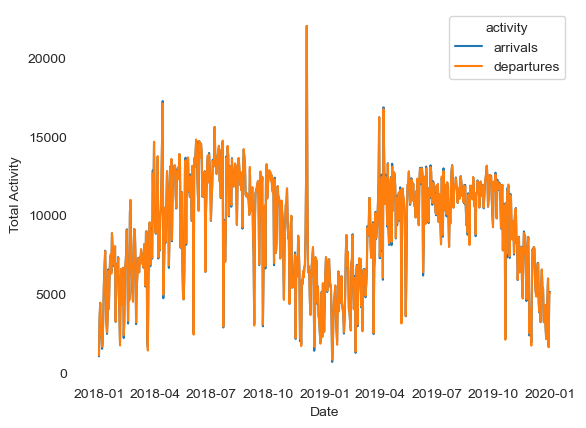

In [8]:
sns.lineplot(
    data=data.groupby(['date'], as_index=False)[['arrivals', 'departures']].sum().melt(id_vars=['date'], var_name='activity', value_name='sum'),
    x='date',
    y='sum',
    hue='activity'
)
sns.despine(right=True, top=True, bottom=True, left=True)
plt.ylabel('Total Activity')
plt.xlabel('Date')
plt.show()

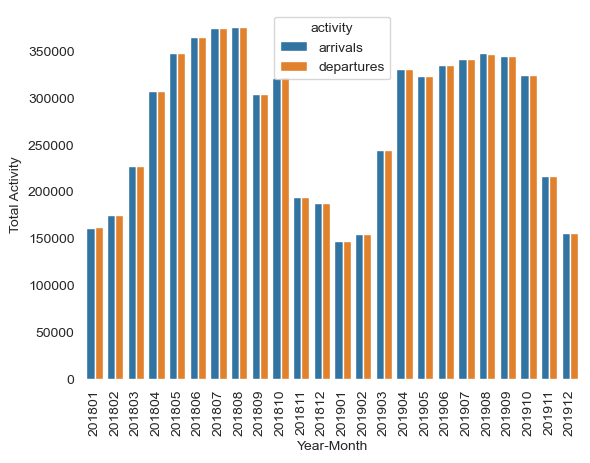

In [33]:
sns.barplot(
    data = data.assign(year_month = lambda df: df['date'].dt.year.astype(str) + df['date'].dt.month.astype(str).str.pad(2, 'left', fillchar='0'))\
    .groupby(['year_month'], as_index=False)[['arrivals', 'departures']].sum().melt(id_vars=['year_month'], var_name=['activity'], value_name='sum'),
    x='year_month',
    y='sum',
    hue='activity'
)
sns.despine(right=True, top=True, bottom=True, left=True)
plt.xticks(rotation=90)
plt.xlabel('Year-Month')
plt.ylabel('Total Activity')
# plt.savefig('../results/year_month_activity.png', bbox_inches='tight')
plt.show()

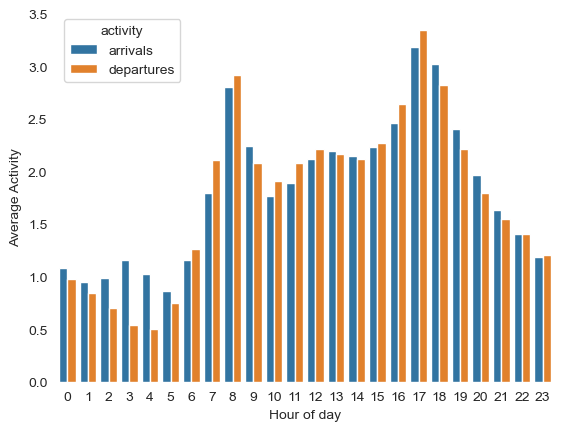

In [34]:
sns.barplot(
    data=data.groupby(['hour'], as_index=False)[['arrivals', 'departures']].mean().melt(id_vars=['hour'], var_name='activity', value_name='mean'),
    x='hour',
    y='mean',
    hue='activity'
)
sns.despine(right=True, top=True, bottom=True, left=True)
plt.xlabel('Hour of day')
plt.ylabel('Average Activity')
# plt.savefig('../results/hourly_average_activity.png', bbox_inches='tight')
plt.show()

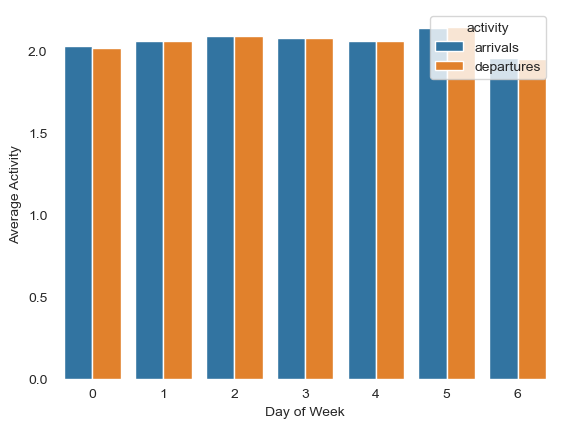

In [11]:
sns.barplot(
    data=data.groupby(['dow'], as_index=False)[['arrivals', 'departures']].mean().melt(id_vars=['dow'], var_name='activity', value_name='mean'),
    x='dow',
    y='mean',
    hue='activity'
)
sns.despine(right=True, top=True, bottom=True, left=True)
plt.xlabel('Day of Week')
plt.ylabel('Average Activity')
plt.show()

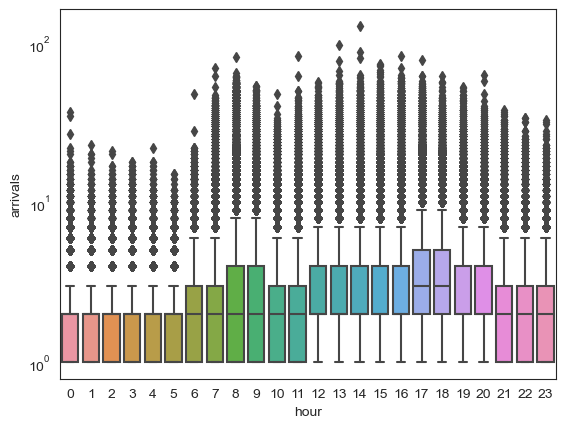

In [12]:
sns.boxplot(
    data=data.assign(arrivals=lambda df: df['arrivals'] + 1),
    x='hour',
    y='arrivals'
)
plt.yscale('log')

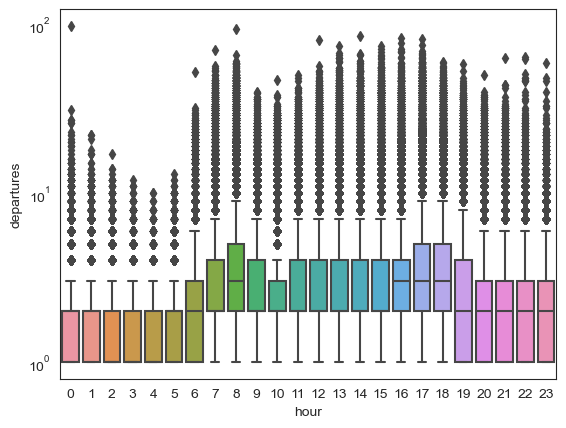

In [13]:
sns.boxplot(
    data=data.assign(departures= lambda df: df['departures'] + 1),
    x='hour',
    y='departures'
)
plt.yscale('log')

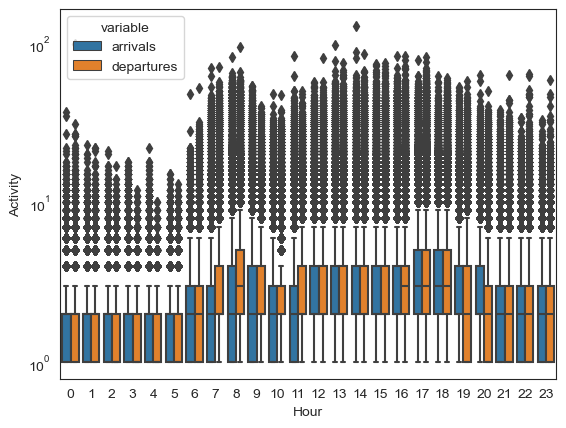

In [35]:
sns.boxplot(
    data=data.assign(arrivals=lambda df: df['arrivals']+1,departures=lambda df: df['departures']+1).melt(id_vars='hour', value_vars=['arrivals', 'departures']),
    x='hour',
    y='value',
    hue='variable'
)
plt.yscale('log')
plt.xlabel('Hour')
plt.ylabel('Activity')
# plt.savefig('../results/hourly_activity_boxplot.png', bbox_inches='tight')
plt.show()

In [ ]:
sns.boxplot(
    data=data.assign(departures= lambda df: df['departures'] + 1),
    x='hour',
    y='departures'
)
plt.yscale('log')

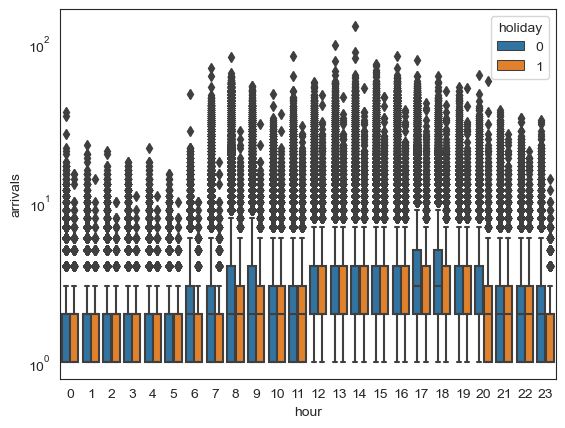

In [14]:
sns.boxplot(
    data=data.assign(arrivals=lambda df: df['arrivals'].add(1)),
    x='hour',
    y='arrivals',
    hue='holiday'
)
plt.yscale('log')
plt.show()

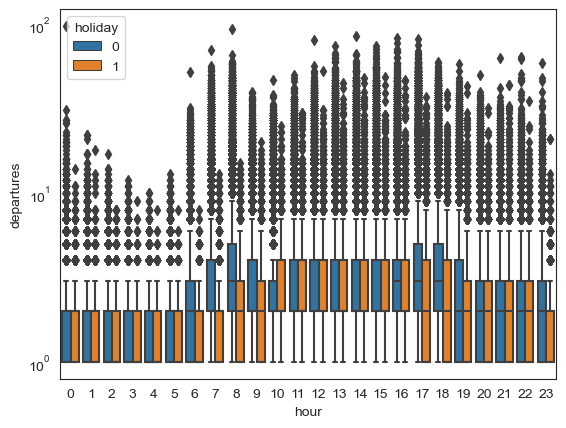

In [15]:
sns.boxplot(
    data=data.assign(departures=lambda df: df['departures'].add(1)),
    x='hour',
    y='departures',
    hue='holiday'
)
plt.yscale('log')
plt.show()

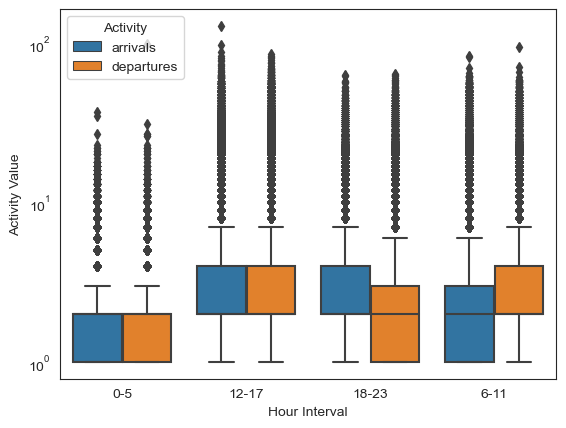

In [16]:
hour_rollup_map = dict(zip(range(4), ['0-5', '6-11', '12-17', '18-23']))
sns.boxplot(
    data=data.assign(
        hour_rollup = lambda df: df['hour'].floordiv(6).map(hour_rollup_map),
        arrivals = lambda df: df['arrivals'] + 1,
        departures = lambda df: df['departures'] + 1
    ).melt(id_vars=['hour_rollup'], value_vars=['arrivals', 'departures'], var_name='Activity').sort_values('hour_rollup'),
    x='hour_rollup',
    y='value',
    hue='Activity'
)
plt.yscale('log')
plt.xlabel('Hour Interval')
plt.ylabel('Activity Value')
plt.show()

In [12]:
avg_geo = data.groupby(['station', 'latitude', 'longitude'], as_index=False)[['arrivals', 'departures', 'available_prop']].mean().assign(avg_flow = lambda df: (df['departures'] - df['arrivals']).round(4))
avg_geo = gpd.GeoDataFrame(avg_geo, geometry=gpd.points_from_xy(avg_geo['longitude'], avg_geo['latitude']))
avg_geo.set_crs('EPSG:4326', inplace=True)

,station,latitude,longitude,arrivals,departures,available_prop,avg_flow,geometry
0,0,38.898925,-77.048852,1.451977,1.451977,-1.568112e-19,0.0000,POINT (-77.04885 38.89892)
1,31000,38.859751,-77.053235,0.908918,0.910183,-8.433481e-05,0.0013,POINT (-77.05324 38.85975)
2,31002,38.856425,-77.049232,1.590627,1.590985,-2.104348e-05,0.0004,POINT (-77.04923 38.85642)
3,31003,38.861056,-77.049417,1.218754,1.218503,1.567005e-05,-0.0003,POINT (-77.04942 38.86106)
4,31004,38.857866,-77.059490,0.864856,0.865353,-4.140444e-05,0.0005,POINT (-77.05949 38.85787)
...,...,...,...,...,...,...,...,...
483,32605,38.883601,-77.173438,0.674385,0.667149,6.029908e-04,-0.0072,POINT (-77.17344 38.8836)
484,32606,38.878085,-77.153953,0.683787,0.696878,-1.090970e-03,0.0131,POINT (-77.15395 38.87808)
485,32607,38.879720,-77.178408,0.654624,0.660405,-4.816956e-04,0.0058,POINT (-77.17841 38.87972)
486,32608,38.885434,-77.173605,0.635783,0.627796,6.656017e-04,-0.0080,POINT (-77.1736 38.88543)


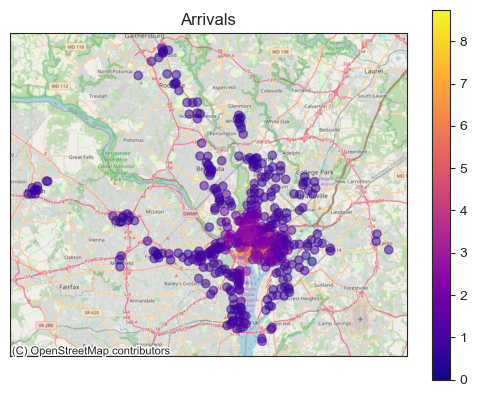

In [15]:
fig, ax = plt.subplots(1,1)
avg_geo.plot(
    ax=ax,
    column='arrivals',
    marker='o',
    cmap='plasma',
    legend=True,
    alpha=0.5,
)
avg_geo = avg_geo.to_crs(epsg=3857)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_xticks([])
ax.set_yticks([])
plt.title('Arrivals')
# plt.savefig('../results/arrivals_average_geo.png', bbox_inches='tight')
plt.show()

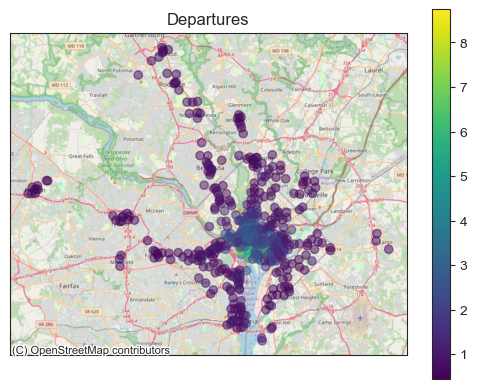

In [16]:
fig, ax = plt.subplots(1,1)
avg_geo.plot(
    ax=ax,
    column='departures',
    marker='o',
    cmap='viridis',
    legend=True,
    alpha=0.5
)
avg_geo = avg_geo.to_crs(epsg=3857)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_xticks([])
ax.set_yticks([])
plt.title('Departures')
# plt.savefig('../results/departures_average_geo.png', bbox_inches='tight')
plt.show()

In [20]:
agg_geo = data.assign(hour_rollup=lambda df: df['hour'].floordiv(6)).groupby(['station', 'latitude', 'longitude', 'hour_rollup'], as_index=False)[['arrivals', 'departures', 'available_prop']].mean()
agg_geo = gpd.GeoDataFrame(agg_geo, geometry=gpd.points_from_xy(agg_geo['longitude'], agg_geo['latitude']))
agg_geo.set_crs('EPSG:4326', inplace=True)

,station,latitude,longitude,hour_rollup,arrivals,departures,available_prop,geometry
0,0,38.898925,-77.048852,0,0.620690,0.551724,0.004057,POINT (-77.04885 38.89892)
1,0,38.898925,-77.048852,1,2.044444,0.811111,0.072549,POINT (-77.04885 38.89892)
2,0,38.898925,-77.048852,2,1.562500,1.679688,-0.006893,POINT (-77.04885 38.89892)
3,0,38.898925,-77.048852,3,1.046729,1.962617,-0.053876,POINT (-77.04885 38.89892)
4,31000,38.859751,-77.053235,0,0.798722,0.565495,0.015548,POINT (-77.05324 38.85975)
...,...,...,...,...,...,...,...,...
1941,32608,38.885434,-77.173605,3,0.845679,0.530864,0.026235,POINT (-77.1736 38.88543)
1942,32609,38.885621,-77.166917,0,0.366667,0.633333,-0.022222,POINT (-77.16692 38.88562)
1943,32609,38.885621,-77.166917,1,0.292181,0.967078,-0.056241,POINT (-77.16692 38.88562)
1944,32609,38.885621,-77.166917,2,0.695876,0.664948,0.002577,POINT (-77.16692 38.88562)


In [24]:
agg_geo['hour_rollup'] = agg_geo['hour_rollup'].map({0:'0-5', 1:'6-11', 2:'12-17', 3:'18-23'})

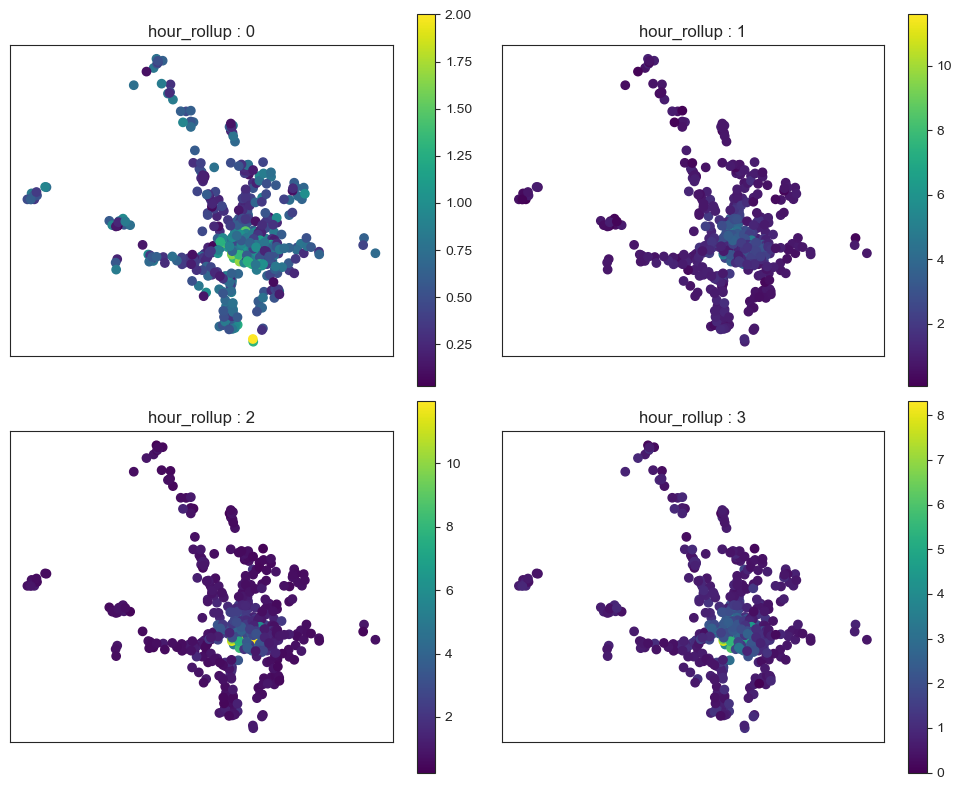

In [23]:
facet_column = 'hour_rollup'
facet_values = agg_geo[facet_column].unique()
ncols = 2
nrows = int(len(facet_values) / ncols) + (len(facet_values) % ncols > 0)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,8))
axes = axes.flatten()

for i, value in enumerate(facet_values):
    subset = agg_geo.query(f'{facet_column}=={value}')
    subset.plot(
        ax=axes[i],
        marker='o',
        column='departures',
        cmap='viridis',
        legend=True
    )
    # subset = subset.to_crs(epsg=3857)
    # ctx.add_basemap(axes[i], source=ctx.providers.Stamen.TerrainBackground)
    axes[i].set_title(f'{facet_column} : {value}')
    axes[i].set_xticks([])
    axes[i].set_yticks([])

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [24]:
data.groupby(['station', 'latitude', 'longitude', 'hour'], as_index=False)[['arrivals', 'departures', 'available_prop']].mean()

,station,latitude,longitude,hour,arrivals,departures,available_prop
0,0,38.898925,-77.048852,0,0.615385,0.615385,0.000000
1,0,38.898925,-77.048852,1,0.666667,0.500000,0.009804
2,0,38.898925,-77.048852,2,0.666667,0.666667,0.000000
3,0,38.898925,-77.048852,3,0.666667,0.333333,0.019608
4,0,38.898925,-77.048852,4,0.500000,0.500000,0.000000
...,...,...,...,...,...,...,...
11623,32609,38.885621,-77.166917,19,1.126437,0.287356,0.069923
11624,32609,38.885621,-77.166917,20,0.891892,0.567568,0.027027
11625,32609,38.885621,-77.166917,21,0.615385,0.692308,-0.006410
11626,32609,38.885621,-77.166917,22,0.666667,0.444444,0.018519


In [25]:
avg_geo = data.groupby(['station', 'latitude', 'longitude'], as_index=False)[['arrivals', 'departures', 'available_prop']].mean().assign(avg_flow = lambda df: (df['departures'] - df['arrivals']).round(4))
avg_geo = gpd.GeoDataFrame(avg_geo, geometry=gpd.points_from_xy(avg_geo['longitude'], avg_geo['latitude']))
avg_geo.set_crs('EPSG:4326', inplace=True)

,station,latitude,longitude,arrivals,departures,available_prop,avg_flow,geometry
0,0,38.898925,-77.048852,1.451977,1.451977,-1.568112e-19,0.0000,POINT (-77.04885 38.89892)
1,31000,38.859751,-77.053235,0.908918,0.910183,-8.433481e-05,0.0013,POINT (-77.05324 38.85975)
2,31002,38.856425,-77.049232,1.590627,1.590985,-2.104348e-05,0.0004,POINT (-77.04923 38.85642)
3,31003,38.861056,-77.049417,1.218754,1.218503,1.567005e-05,-0.0003,POINT (-77.04942 38.86106)
4,31004,38.857866,-77.059490,0.864856,0.865353,-4.140444e-05,0.0005,POINT (-77.05949 38.85787)
...,...,...,...,...,...,...,...,...
483,32605,38.883601,-77.173438,0.674385,0.667149,6.029908e-04,-0.0072,POINT (-77.17344 38.8836)
484,32606,38.878085,-77.153953,0.683787,0.696878,-1.090970e-03,0.0131,POINT (-77.15395 38.87808)
485,32607,38.879720,-77.178408,0.654624,0.660405,-4.816956e-04,0.0058,POINT (-77.17841 38.87972)
486,32608,38.885434,-77.173605,0.635783,0.627796,6.656017e-04,-0.0080,POINT (-77.1736 38.88543)


## predictor variables and their relationship with the outcome variables

In [27]:
## temperature based exploration
base_weather_data = data[['date', 'tavg', 'tmax', 'tmin', 'prcp', 'snow']].drop_duplicates()

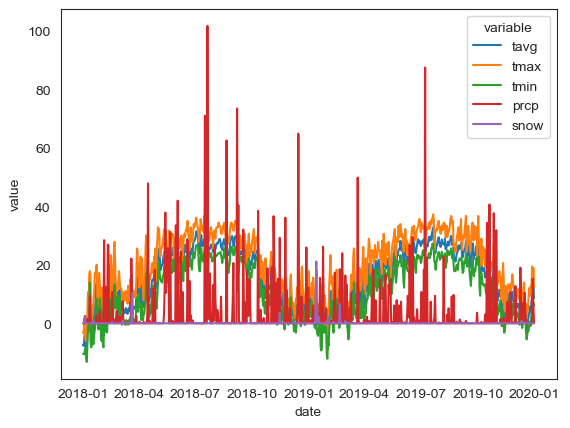

In [28]:
## sanity check
sns.lineplot(
    data=base_weather_data.melt(id_vars=['date']),
    x='date',
    y='value',
    hue='variable'
)
plt.show()

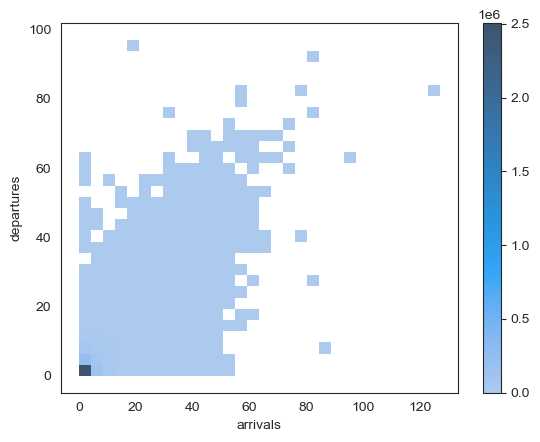

In [37]:
sns.histplot(
    data=data,
    x='arrivals',
    y='departures',
    bins=30,
    pmax=0.9,
    cbar=True
)
plt.show()

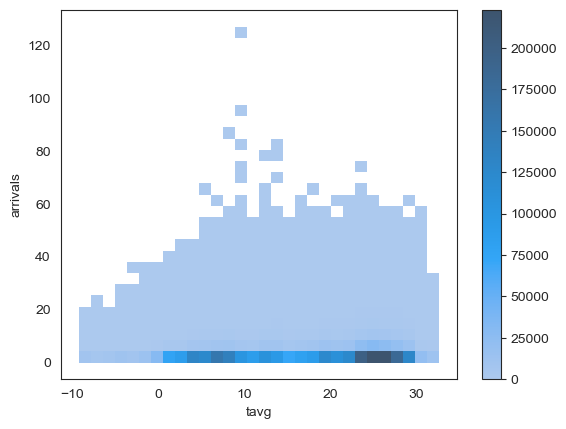

In [46]:
sns.histplot(
    data=data,
    y='arrivals',
    x='tavg',
    bins=30,
    pmax=0.9,
    cbar=True
)
plt.show()

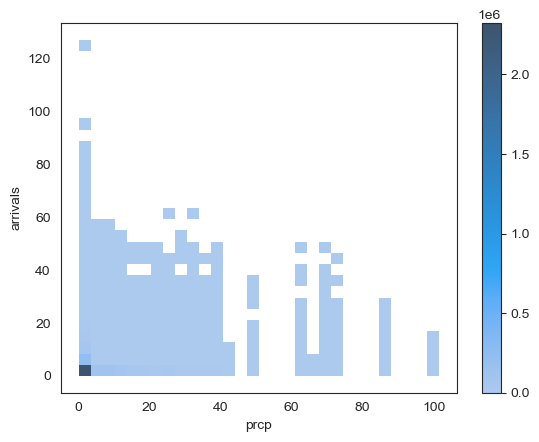

In [39]:
sns.histplot(
    data=data,
    y='arrivals',
    x='prcp',
    bins=30,
    pmax=0.9,
    cbar=True
)
plt.show()

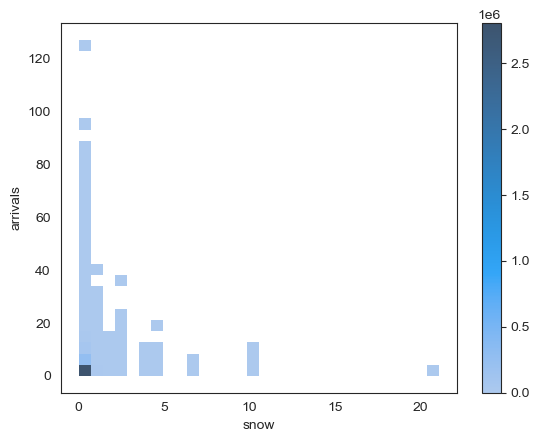

In [40]:
sns.histplot(
    data=data,
    y='arrivals',
    x='snow',
    bins=30,
    pmax=0.9,
    cbar=True
)
plt.show()

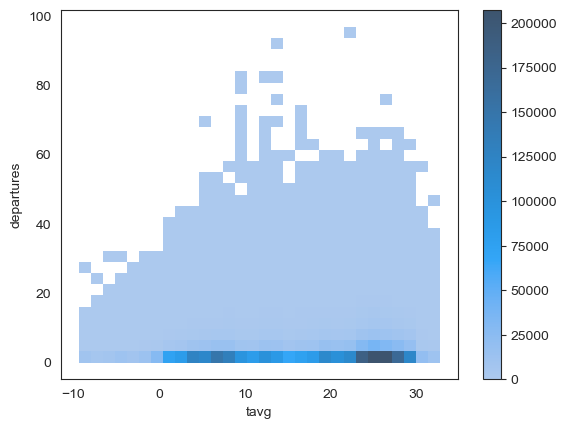

In [41]:
sns.histplot(
    data=data,
    y='departures',
    x='tavg',
    bins=30,
    pmax=0.9,
    cbar=True
)
plt.show()

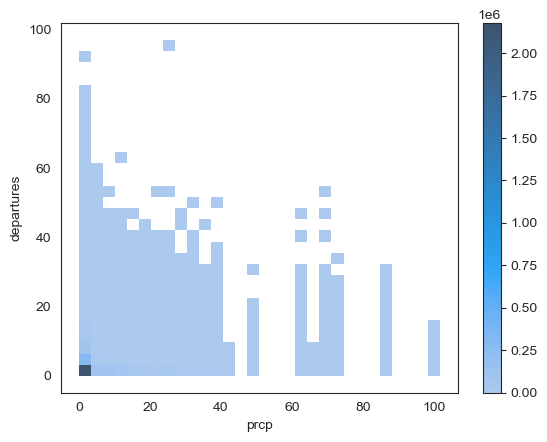

In [42]:
sns.histplot(
    data=data,
    y='departures',
    x='prcp',
    bins=30,
    pmax=0.9,
    cbar=True
)
plt.show()

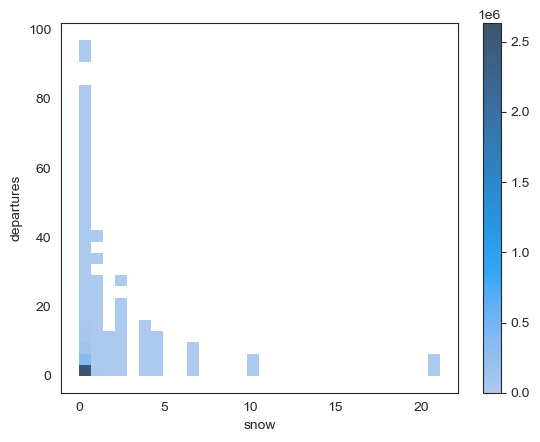

In [43]:
sns.histplot(
    data=data,
    y='departures',
    x='snow',
    bins=30,
    pmax=0.9,
    cbar=True
)
plt.show()

In [17]:
## correlation between variables and behavior
corr_mat = data.groupby(['station', 'date'], as_index=False)[['arrivals', 'departures', 'tmin', 'tmax', 'tavg', 'prcp', 'snow']].mean()[['arrivals', 'departures', 'tmin', 'tmax', 'tavg', 'prcp', 'snow']].corr()
mask = np.triu(np.ones_like(corr_mat, dtype=bool))


c:\Users\Owner\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


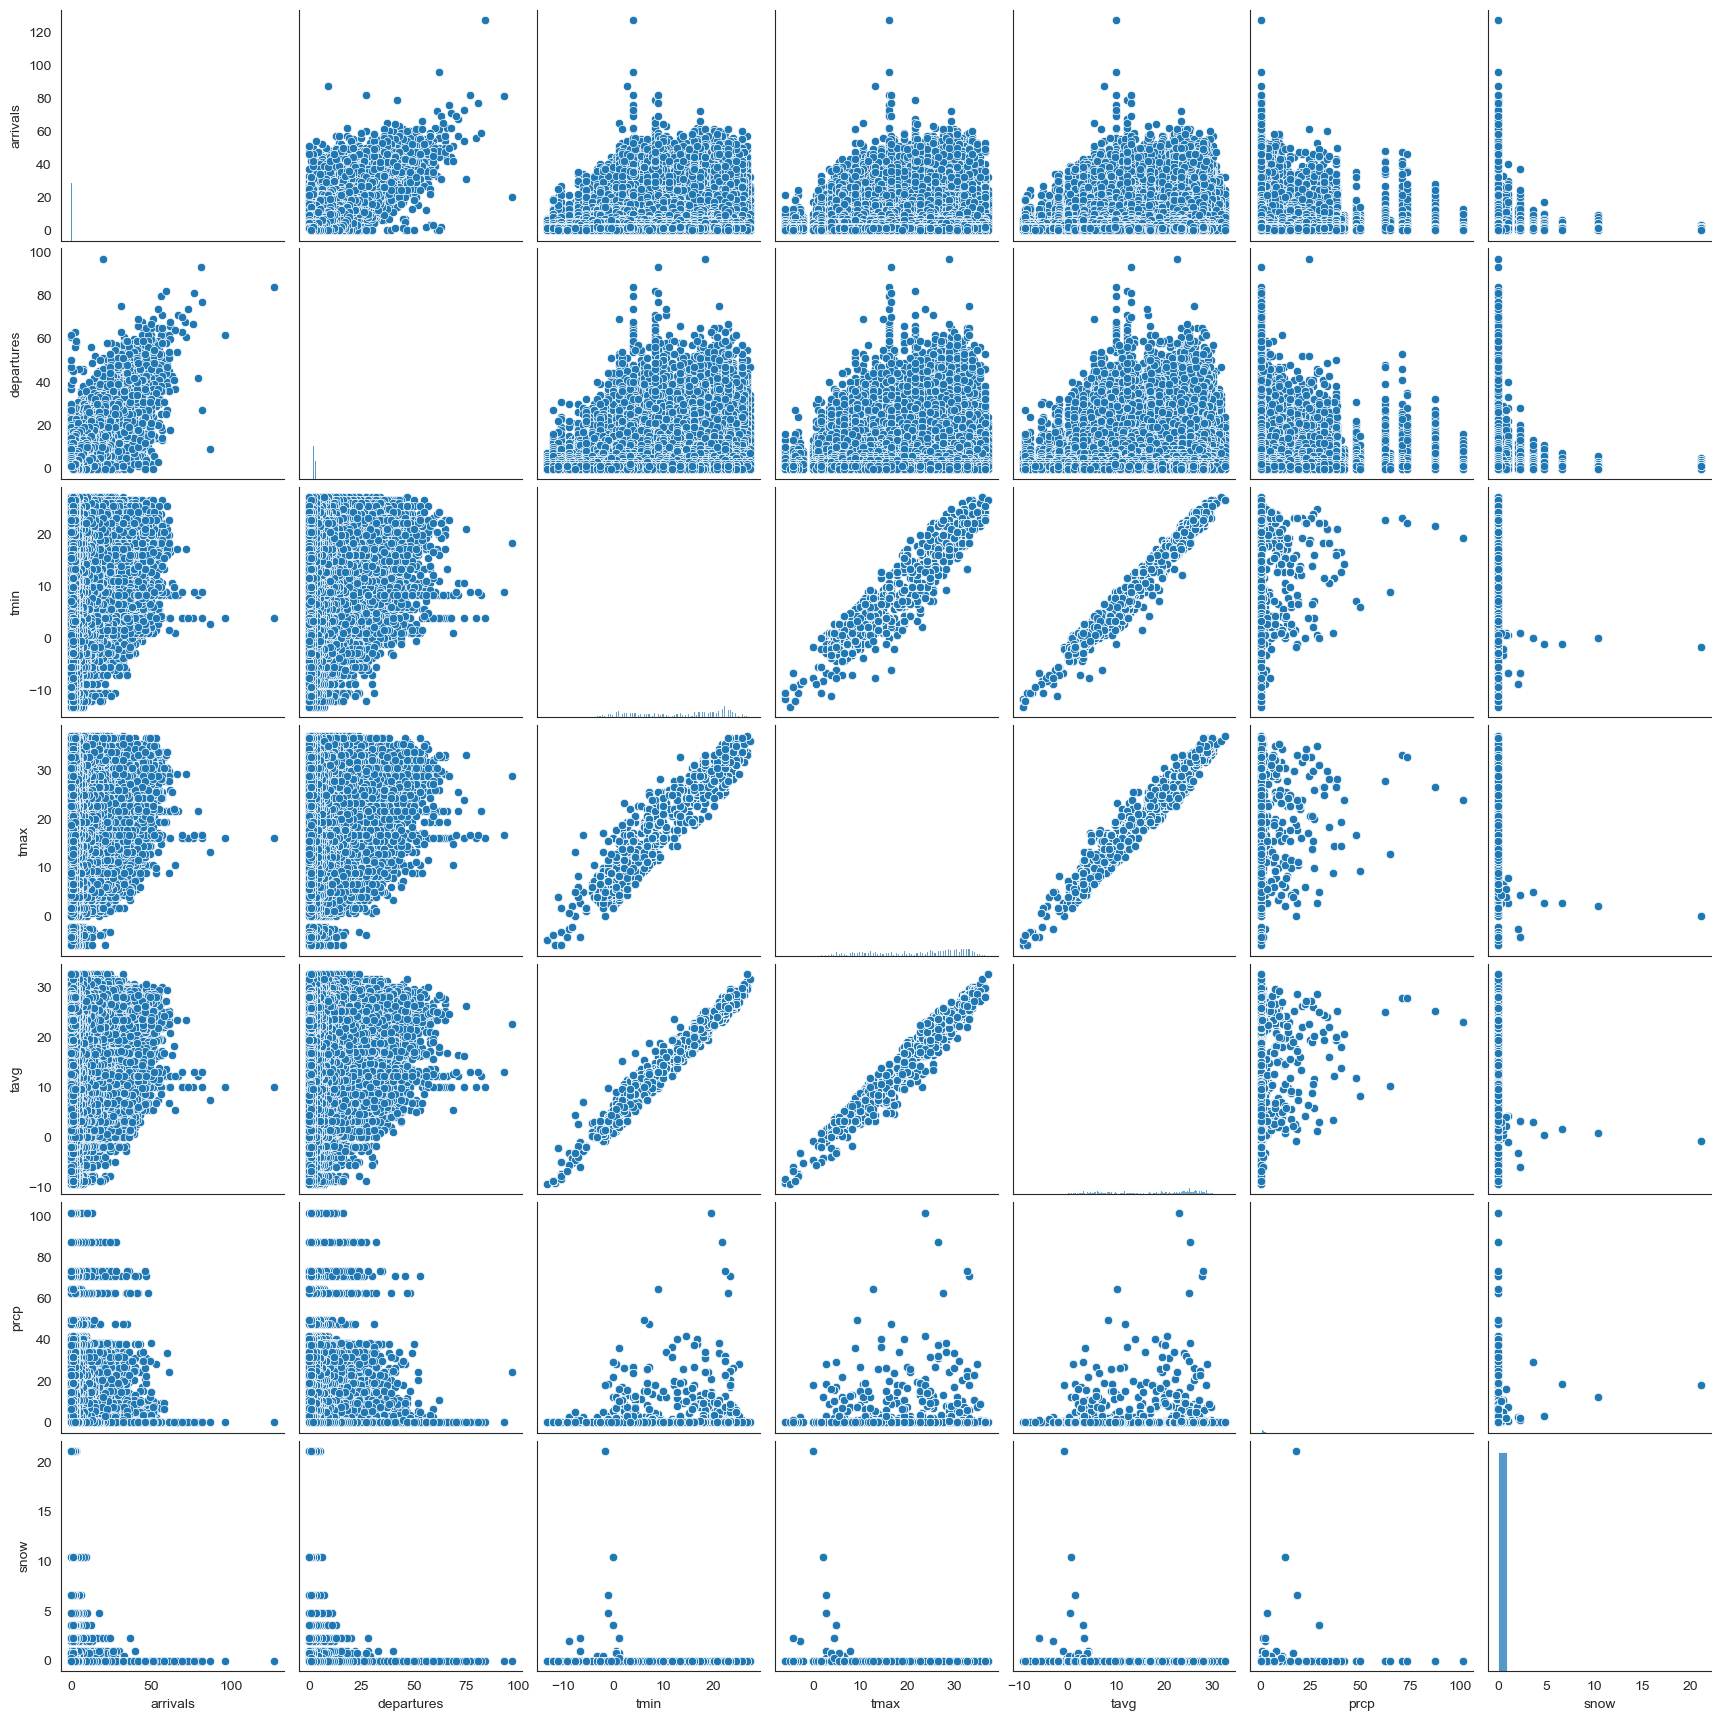

In [27]:
sns.pairplot(data[['arrivals', 'departures', 'tmin', 'tmax', 'tavg', 'prcp', 'snow']], diag_kind='hist')
# plt.savefig('../results/pairplot_quantitative.png', bbox_inches='tight')
plt.show()

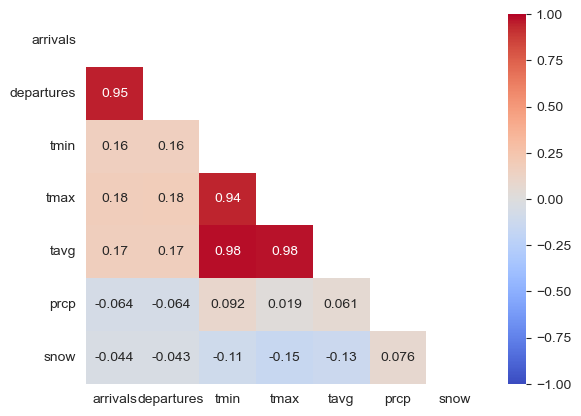

In [18]:
sns.heatmap(corr_mat, mask=mask, annot=True, cmap='coolwarm', vmax=1, vmin=-1)
# plt.savefig('../results/correlation_heatmap.png', bbox_inches='tight')
plt.show()

<Axes: >

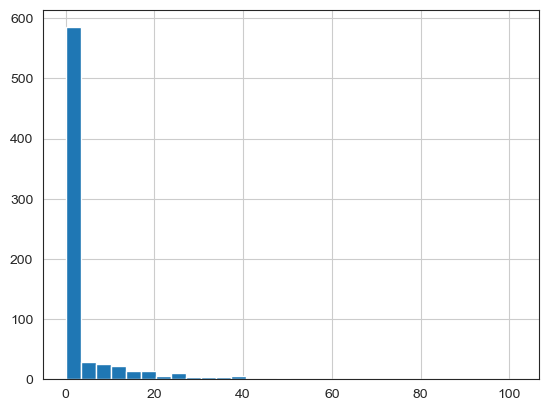

In [57]:
## precipation by threshold
base_weather_data['prcp'].hist(bins=30)

<Axes: >

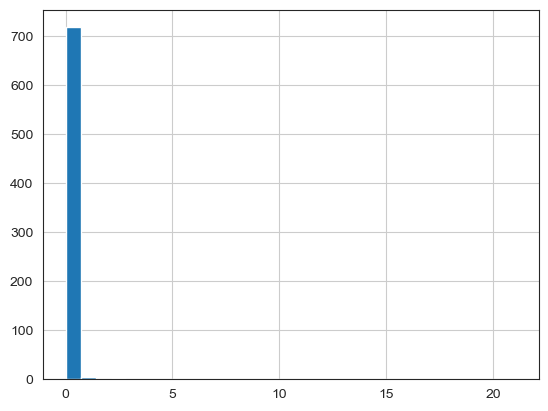

In [61]:
base_weather_data['snow'].hist(bins=30)

In [60]:
base_weather_data[['prcp', 'snow']].describe()

,prcp,snow
count,730.000000,730.000000
mean,3.781370,0.080959
std,10.178378,0.942100
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.300000,0.000000
max,101.600000,21.100000


In [62]:
## make indicators for whether or not there was any snow or prcp
data['is_snow'] = (data['snow'] > 0).astype(int)
data['is_prcp'] = (data['prcp'] > 0).astype(int)

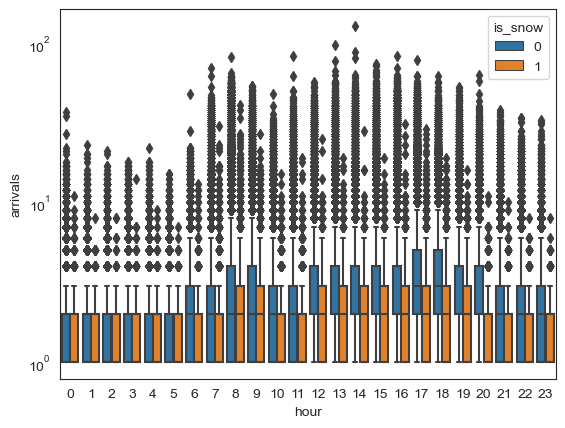

In [66]:
sns.boxplot(
    data=data.assign(arrivals=lambda df: df['arrivals'].add(1)),
    y='arrivals',
    hue='is_snow',
    x='hour'
)
plt.yscale('log')

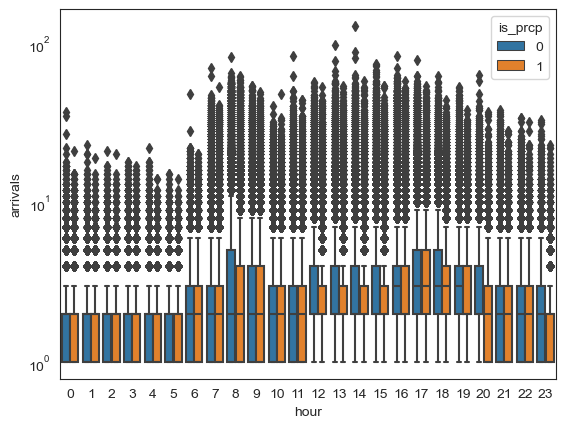

In [67]:
sns.boxplot(
    data=data.assign(arrivals=lambda df: df['arrivals'].add(1)),
    y='arrivals',
    hue='is_prcp',
    x='hour'
)
plt.yscale('log')

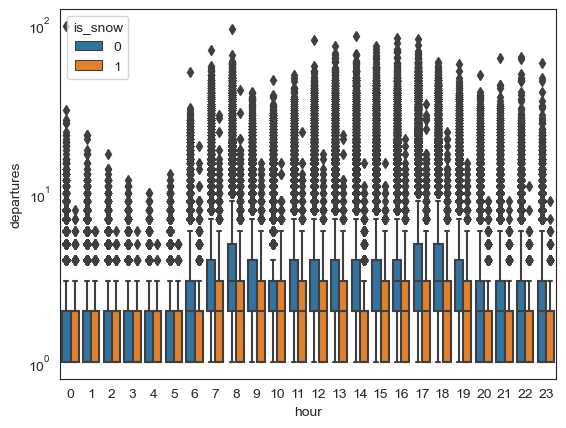

In [70]:
sns.boxplot(
    data=data.assign(departures=lambda df: df['departures'].add(1)),
    y='departures',
    hue='is_snow',
    x='hour'
)
plt.yscale('log')

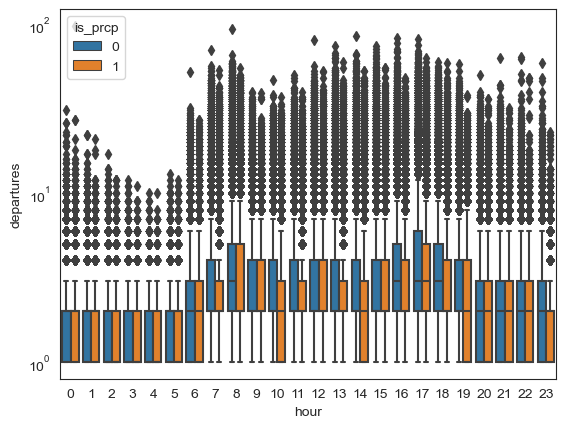

In [71]:
sns.boxplot(
    data=data.assign(departures=lambda df: df['departures'].add(1)),
    y='departures',
    hue='is_prcp',
    x='hour'
)
plt.yscale('log')